In [1]:
def psi(t, psi_0_ket, H):
    lpsi = len(psi_0_ket)
    lH = H.shape[0]
    assert lpsi == lH
    
    psi_t_ket = np.dot(expm(- 1j*t*H),psi_0_ket) # |\psi(t)> = e^{-i t H} |\psi(0) >
    return psi_t_ket

In [2]:
from matplotlib import pyplot as plt
from scipy.linalg import expm
import numpy as np
' definamos un Hamiltoniano '
A = np.random.randn(2,2) + np.random.randn(2,2)*1j
A = np.asmatrix(A)
H = A + A.getH()

'estado inicial |psi(0)>'
psi_0_array = np.array([1,0])
psi_0_ket = psi_0_array.reshape(len(psi_0_array),1)  # Vector columna
psi_0_bra = psi_0_array                              # Vector fila


t_end = 2   # Tiempo final
steps = 100
t_list= np.linspace(0, t_end, steps + 1)  # Lista de tiempos intermedios

'estado a tiempo t |psi(t)>'
psi_t_ket_list = [psi(t_list[i], psi_0_ket, H) for i in range(len(t_list))]   #  |\psi(t)>

'probabilidades'
p_00_t_list = [np.abs(psi_t_ket_list[i][0,0])**2  for i in range(len(t_list))]  # p_0(t) 
p_01_t_list = [np.abs(psi_t_ket_list[i][1,0])**2  for i in range(len(t_list))]  # p_1(t)

'valores esperados <H>(t)'
psi_t_bra_list= [psi_t_ket_list[i].conj().reshape(1, len(psi_0_array)) for i in range(len(t_list))] #  <\psi(t)|

H_ev_t_list = [np.dot(psi_t_bra_list[i], np.dot(H, psi_t_ket_list[i])).real[0,0] for i in range(len(t_list))] # <\psi | H | \psi>


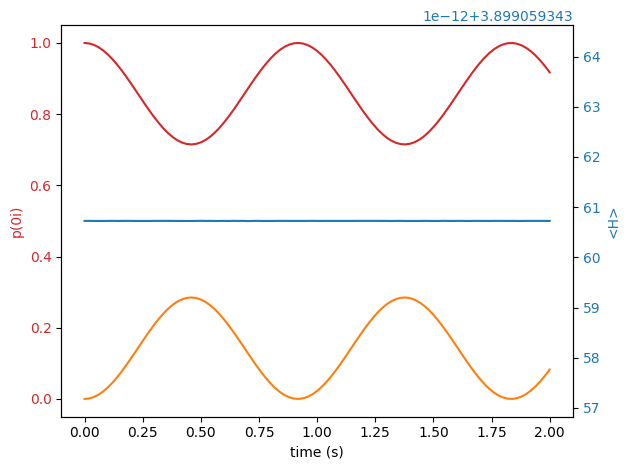

In [3]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('p(0i)', color= 'tab:red')
ax1.plot(t_list, p_00_t_list, color= 'tab:red')
ax1.plot(t_list, p_01_t_list, color= 'tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('<H>', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(t_list,H_ev_t_list, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()